In [1]:
import pysplit
import pandas as pd
import numpy as np
from wrf import getvar, get_basemap, latlon_coords
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
import matplotlib as mpl
import xarray as xr
from itertools import product
import matplotlib.patheffects as path_effects

In [2]:
def regions_to_str(number):
    
    m = {
         1: 'West Coast',
         3: 'Central Interior',
         4: 'North Slope',
         5: 'Northeast Interior',
         6: 'Southeast Interior'
        }

    try:
        out = m[number]
        return out
    
    except:
        raise ValueError('Not a region')

In [3]:
maskfile = xr.open_dataset('/glade/scratch/molina/basile/maskfile.nc')
land=np.ma.masked_where(maskfile.land.values==1, maskfile.land.values)
goa=np.ma.masked_where(maskfile.goa.values==1, maskfile.goa.values)
bs=np.ma.masked_where(maskfile.bs.values==1, maskfile.bs.values)
ao=np.ma.masked_where(maskfile.ao.values==1, maskfile.ao.values)

In [4]:
which_climate='hist'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion1_{which_climate}.nc").frequency
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion3_{which_climate}.nc").frequency
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion4_{which_climate}.nc").frequency
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion5_{which_climate}.nc").frequency
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion6_{which_climate}.nc").frequency

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion1_{which_climate}.nc").frequency
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion3_{which_climate}.nc").frequency
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion4_{which_climate}.nc").frequency
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion5_{which_climate}.nc").frequency
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion6_{which_climate}.nc").frequency

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion1_{which_climate}.nc").frequency
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion3_{which_climate}.nc").frequency
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion4_{which_climate}.nc").frequency
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion5_{which_climate}.nc").frequency
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion6_{which_climate}.nc").frequency

reg1c=ds1+ds6+ds11
reg3c=ds2+ds7+ds12
reg4c=ds3+ds8+ds13
reg5c=ds4+ds9+ds14
reg6c=ds5+ds10+ds15

In [5]:
which_climate='pgw'

ds1=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion1_{which_climate}.nc").frequency
ds2=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion3_{which_climate}.nc").frequency
ds3=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion4_{which_climate}.nc").frequency
ds4=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion5_{which_climate}.nc").frequency
ds5=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jun_subregion6_{which_climate}.nc").frequency

ds6=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion1_{which_climate}.nc").frequency
ds7=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion3_{which_climate}.nc").frequency
ds8=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion4_{which_climate}.nc").frequency
ds9=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion5_{which_climate}.nc").frequency
ds10=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_jul_subregion6_{which_climate}.nc").frequency

ds11=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion1_{which_climate}.nc").frequency
ds12=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion3_{which_climate}.nc").frequency
ds13=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion4_{which_climate}.nc").frequency
ds14=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion5_{which_climate}.nc").frequency
ds15=xr.open_dataset(f"/glade/scratch/molina/basile/traj_files/trajfile_aug_subregion6_{which_climate}.nc").frequency

reg1f=ds1+ds6+ds11
reg3f=ds2+ds7+ds12
reg4f=ds3+ds8+ds13
reg5f=ds4+ds9+ds14
reg6f=ds5+ds10+ds15

In [6]:
land_1c=np.nansum(np.ma.masked_where(land.mask==False, reg1c))/reg1c.values.sum()*100
land_2c=np.nansum(np.ma.masked_where(land.mask==False, reg3c))/reg3c.values.sum()*100
land_3c=np.nansum(np.ma.masked_where(land.mask==False, reg4c))/reg4c.values.sum()*100
land_4c=np.nansum(np.ma.masked_where(land.mask==False, reg5c))/reg5c.values.sum()*100
land_5c=np.nansum(np.ma.masked_where(land.mask==False, reg6c))/reg6c.values.sum()*100

land_1f=np.nansum(np.ma.masked_where(land.mask==False, reg1f))/reg1f.values.sum()*100
land_2f=np.nansum(np.ma.masked_where(land.mask==False, reg3f))/reg3f.values.sum()*100
land_3f=np.nansum(np.ma.masked_where(land.mask==False, reg4f))/reg4f.values.sum()*100
land_4f=np.nansum(np.ma.masked_where(land.mask==False, reg5f))/reg5f.values.sum()*100
land_5f=np.nansum(np.ma.masked_where(land.mask==False, reg6f))/reg6f.values.sum()*100

In [7]:
ao_1c=np.nansum(np.ma.masked_where(ao.mask==False, reg1c))/reg1c.values.sum()*100
ao_2c=np.nansum(np.ma.masked_where(ao.mask==False, reg3c))/reg3c.values.sum()*100
ao_3c=np.nansum(np.ma.masked_where(ao.mask==False, reg4c))/reg4c.values.sum()*100
ao_4c=np.nansum(np.ma.masked_where(ao.mask==False, reg5c))/reg5c.values.sum()*100
ao_5c=np.nansum(np.ma.masked_where(ao.mask==False, reg6c))/reg6c.values.sum()*100

ao_1f=np.nansum(np.ma.masked_where(ao.mask==False, reg1f))/reg1f.values.sum()*100
ao_2f=np.nansum(np.ma.masked_where(ao.mask==False, reg3f))/reg3f.values.sum()*100
ao_3f=np.nansum(np.ma.masked_where(ao.mask==False, reg4f))/reg4f.values.sum()*100
ao_4f=np.nansum(np.ma.masked_where(ao.mask==False, reg5f))/reg5f.values.sum()*100
ao_5f=np.nansum(np.ma.masked_where(ao.mask==False, reg6f))/reg6f.values.sum()*100

In [8]:
goa_1c=np.nansum(np.ma.masked_where(goa.mask==False, reg1c))/reg1c.values.sum()*100
goa_2c=np.nansum(np.ma.masked_where(goa.mask==False, reg3c))/reg3c.values.sum()*100
goa_3c=np.nansum(np.ma.masked_where(goa.mask==False, reg4c))/reg4c.values.sum()*100
goa_4c=np.nansum(np.ma.masked_where(goa.mask==False, reg5c))/reg5c.values.sum()*100
goa_5c=np.nansum(np.ma.masked_where(goa.mask==False, reg6c))/reg6c.values.sum()*100

goa_1f=np.nansum(np.ma.masked_where(goa.mask==False, reg1f))/reg1f.values.sum()*100
goa_2f=np.nansum(np.ma.masked_where(goa.mask==False, reg3f))/reg3f.values.sum()*100
goa_3f=np.nansum(np.ma.masked_where(goa.mask==False, reg4f))/reg4f.values.sum()*100
goa_4f=np.nansum(np.ma.masked_where(goa.mask==False, reg5f))/reg5f.values.sum()*100
goa_5f=np.nansum(np.ma.masked_where(goa.mask==False, reg6f))/reg6f.values.sum()*100

In [9]:
bs_1c=np.nansum(np.ma.masked_where(bs.mask==False, reg1c))/reg1c.values.sum()*100
bs_2c=np.nansum(np.ma.masked_where(bs.mask==False, reg3c))/reg3c.values.sum()*100
bs_3c=np.nansum(np.ma.masked_where(bs.mask==False, reg4c))/reg4c.values.sum()*100
bs_4c=np.nansum(np.ma.masked_where(bs.mask==False, reg5c))/reg5c.values.sum()*100
bs_5c=np.nansum(np.ma.masked_where(bs.mask==False, reg6c))/reg6c.values.sum()*100

bs_1f=np.nansum(np.ma.masked_where(bs.mask==False, reg1f))/reg1f.values.sum()*100
bs_2f=np.nansum(np.ma.masked_where(bs.mask==False, reg3f))/reg3f.values.sum()*100
bs_3f=np.nansum(np.ma.masked_where(bs.mask==False, reg4f))/reg4f.values.sum()*100
bs_4f=np.nansum(np.ma.masked_where(bs.mask==False, reg5f))/reg5f.values.sum()*100
bs_5f=np.nansum(np.ma.masked_where(bs.mask==False, reg6f))/reg6f.values.sum()*100

In [10]:
bars1=[goa_1c,goa_2c,goa_3c,goa_4c,goa_5c]
bars2=[bs_1c,bs_2c,bs_3c,bs_4c,bs_5c]
bars3=[ao_1c,ao_2c,ao_3c,ao_4c,ao_5c]
bars4=[land_1c,land_2c,land_3c,land_4c,land_5c]

bars5=[goa_1f,goa_2f,goa_3f,goa_4f,goa_5f]
bars6=[bs_1f,bs_2f,bs_3f,bs_4f,bs_5f]
bars7=[ao_1f,ao_2f,ao_3f,ao_4f,ao_5f]
bars8=[land_1f,land_2f,land_3f,land_4f,land_5f]

names = [regions_to_str(1)+' HIST',regions_to_str(1)+' PGW',
         '',
         regions_to_str(3)+' HIST',regions_to_str(3)+' PGW',
         '',
         regions_to_str(4)+' HIST',regions_to_str(4)+' PGW',
         '',
         regions_to_str(5)+' HIST',regions_to_str(5)+' PGW',
         '',
         regions_to_str(6)+' HIST',regions_to_str(6)+' PGW']

In [11]:
bars12 = np.add(bars1, bars2).tolist()
bars13 = np.add(bars12, bars3).tolist()

bars56 = np.add(bars5, bars6).tolist()
bars57 = np.add(bars56, bars7).tolist()

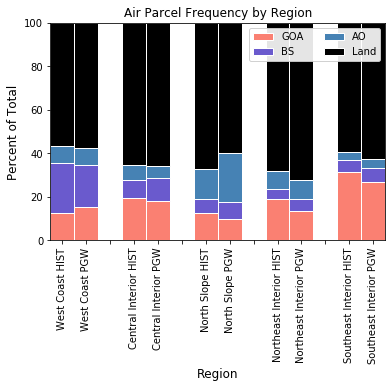

In [12]:
plt.title("Air Parcel Frequency by Region")

plt.bar([0,3,6,9,12], bars1, color='salmon', edgecolor='white', width=1, label='GOA')
plt.bar([0,3,6,9,12], bars2, bottom=bars1, color='slateblue', edgecolor='white', width=1, label='BS')
plt.bar([0,3,6,9,12], bars3, bottom=bars12, color='steelblue', edgecolor='white', width=1, label='AO')
plt.bar([0,3,6,9,12], bars4, bottom=bars13, color='k', edgecolor='white', width=1, label='Land')

plt.bar([1,4,7,10,13], bars5, color='salmon', edgecolor='white', width=1)
plt.bar([1,4,7,10,13], bars6, bottom=bars5, color='slateblue', edgecolor='white', width=1)
plt.bar([1,4,7,10,13], bars7, bottom=bars56,color='steelblue', edgecolor='white', width=1)
plt.bar([1,4,7,10,13], bars8, bottom=bars57,color='k', edgecolor='white', width=1)

plt.xticks(np.arange(0,14), names, rotation=90)
plt.legend(ncol=2, framealpha=0.9)

plt.xlabel("Region", fontsize=12)
plt.ylabel("Percent of Total", fontsize=12)

plt.margins(x=0.,y=0.)

plt.savefig(f"/glade/work/molina/DATA/temp_figs/alaska_freq_bar1.png", bbox_inches='tight', dpi=200)